In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
pip install tensorflow numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Generator Model
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation="relu", input_dim=100))
    model.add(layers.Reshape((4, 4, 8)))
    model.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(32, kernel_size=4, strides=2, padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(1, kernel_size=4, strides=2, padding='same', activation='sigmoid'))
    return model

# Discriminator Model
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, kernel_size=4, strides=2, padding='same', input_shape=(32, 32, 1)))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Conv2D(64, kernel_size=4, strides=2, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Compile GAN
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Combined Model (GAN)
discriminator.trainable = False
gan_input = layers.Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = tf.keras.models.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
import numpy as np

def train_gan(generator, discriminator, gan, data, epochs=10000, batch_size=64):
    for epoch in range(epochs):
        # Train Discriminator
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_images = generator.predict(noise)
        real_images = data[np.random.randint(0, data.shape[0], batch_size)]
        combined_images = np.concatenate([gen_images, real_images])
        labels = np.concatenate([np.zeros((batch_size, 1)), np.ones((batch_size, 1))])

        d_loss = discriminator.train_on_batch(combined_images, labels)

        # Train Generator
        misleading_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, misleading_labels)

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


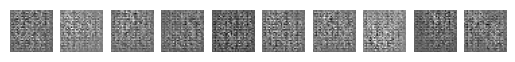

In [ ]:
import matplotlib.pyplot as plt

def plot_generated_images(generator, n_images=10):
    noise = np.random.normal(0, 1, (n_images, 100))
    gen_images = generator.predict(noise)
    for i in range(n_images):
        plt.subplot(1, n_images, i+1)
        plt.imshow(gen_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()

plot_generated_images(generator)